In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as IPdisplay
from IPython.display import HTML
import io
import base64

In [56]:
## Quadratic 'the one that is not a ball'
#def f(t):
#    return t**2

## cos 'pointy ball'
#def f(t):
#    return np.cos(np.pi*t/2)

## sqrt 'Tower'
#def f(t):
#    return np.sqrt(t+1)

## Quadratic 'pointy ball'
#def f(t):
#    return 1 - t**2

## Sphere
#def f(t):
#    return np.sqrt(1-t**2)

## Rain drop
#def f(t):
#    return -(t+1)*(t-1)*(1+np.sin(t))

## OtherThing
def f(t):
    return -(t+1)*(t-1)*(t**2 + t + 0.3)

## Kind of like a spinning top
#def f(t):
#    return (1.5 + np.cos(5*t))*(t+1)*(t-1)*(t-2)/3.


<IPython.core.display.Javascript object>


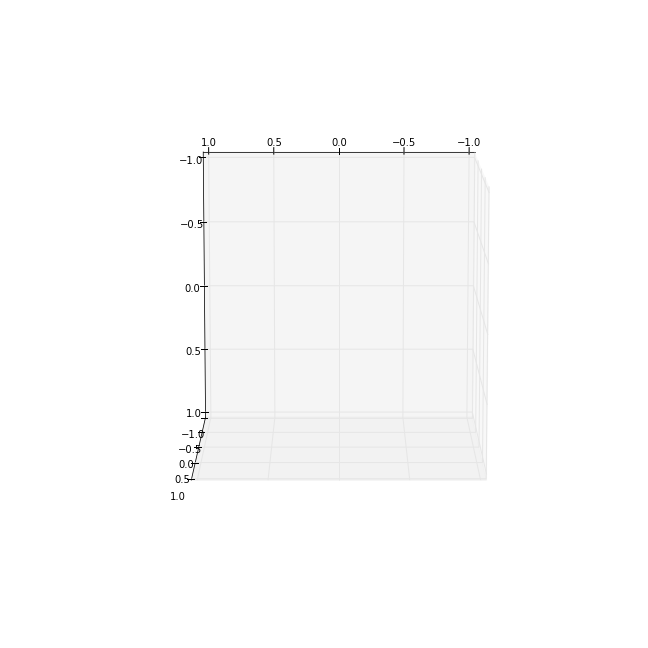

In [57]:
# Generate frames

Ns, Nt = 50,50
Nf = 41

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

Tcnt = 0
for T in np.linspace(0,2*np.pi,Nf)[1:]:

    s = np.linspace(-1, 1, Ns)
    t = np.linspace( 0, T, Nt)
    sGrid, tGrid = np.meshgrid(s, t, indexing='ij')

    y = sGrid
    x = f(y)*np.cos(tGrid)
    z = f(y)*np.sin(tGrid)
    
    my_col = cm.Paired((y - y.min())/(y.max()-y.min()))
    my_col[:,:,-1] = 0.7


    
    # These turn on an outer 'shell'
    plot = ax.plot_surface(x, y, z, rstride=2, cstride=2, facecolors=my_col)
    #plot.set_edgecolors(np.array([0.,0.,0.,0.]))

    ax.view_init(100,90)
    ax.set_ylim3d((-1,1))
    ax.set_xlim3d((-1.,1.))
    ax.set_zlim3d((-1.,1.))
    plt.draw()
    plt.savefig("{0:04d}.png".format(Tcnt))
    
    plt.cla()
    
    Tcnt += 1

In [58]:
video = io.open('Urn.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))